In [33]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from scipy.stats import linregress

In [34]:
#Kaggle cmd will download zip to current file directory -kaggle.json in User folder .kaggle folder
!kaggle datasets download -d zynicide/wine-reviews --force -p ../Resources

 92%|███████████████████████████████████   | 47.0M/50.9M [00:01<00:00, 31.0MB/s]
100%|██████████████████████████████████████| 50.9M/50.9M [00:01<00:00, 47.3MB/s]


In [35]:
#Unzip Kaggle Data
import zipfile

Dataset = "wine-reviews"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(f"../Resources/{Dataset}.zip","r") as z:
    z.extractall("../Resources")

In [36]:
# Reading csv and cleaning column names
df = pd.read_csv('../Resources/winemag-data-130k-v2.csv')
df.drop(['Unnamed: 0', 'taster_twitter_handle', 'taster_name', 'region_1', 'region_2'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [37]:
#Defining method for grabbing lower and upper outliers
def get_outliers(_series):
    #Calculating Quartiles/IQR
    q1 = _series.quantile(.25)
    q2 = _series.quantile(.75)
    iqr = 1.5*(q2-q1)
    
    lower = q1 - iqr
    upper = q2 + iqr
    return (lower, upper)

Across total data population


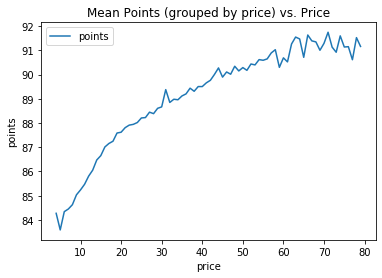

In [38]:
#Grabbing points betweeen lower and upper price outliers
lower, upper = get_outliers(df['price'])
df_price_vs_rating = (df[df['price']
                         .between(lower, upper, inclusive=True)][['price', 'points']]
                         .dropna(how='any'))

#Decided to use mean points as a comparison value because the point data value is too condensed and skews the graph
price_mean_points_df = df_price_vs_rating.sort_values(by='price', ascending='False').groupby('price').mean()
price_mean_points_df.plot()
plt.ylabel('points')
plt.title('Mean Points (grouped by price) vs. Price')

print("Across total data population")
plt.show()

In [39]:
def plot_country(_name):
    #Filtering by country name
    country_df = (df[df['country'] == _name]
                  .dropna(subset=['price', 'points'],how='any')[['price', 'points']])
    
    #Grabbing points betweeen lower and upper price outliers
    lower, upper = get_outliers(country_df['price'])
    outlier_inclusie_df = (country_df[country_df['price']
                                      .between(lower, upper, inclusive=True)])
    
    #Plotting line against mean points by price vs price for country
    pd.DataFrame(outlier_inclusie_df.groupby('price').mean()).plot()
    plt.title(f'{_name} - Mean Points (grouped by price) vs. Price')
    plt.savefig(f"../Analysis/png_output/{_name}_Line")
    plt.show()
    
    #Scatter price vs points for country
    plt.scatter(outlier_inclusie_df['price'], outlier_inclusie_df['points'])
    plt.title(f"{_name} - Price vs. Points w/o Outliers")
    plt.savefig(f"../Analysis/png_output/{_name}_Scatter")
    plt.show()

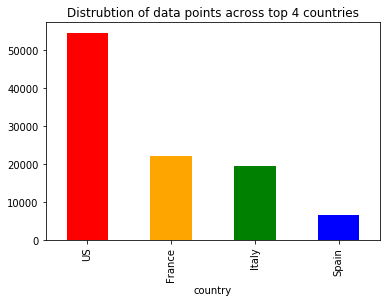

In [44]:
#Plotting data point count across top 4 countries
(df.groupby('country')
 .agg(['count'])['description']['count']
 .sort_values(ascending=False)
 .head(4)
 .plot(kind='bar', color=['red', 'orange', 'green', 'blue']))

plt.title('Distrubtion of data points across top 4 countries')

plt.savefig(f"../Analysis/png_output/total_points_top_4")
plt.show()

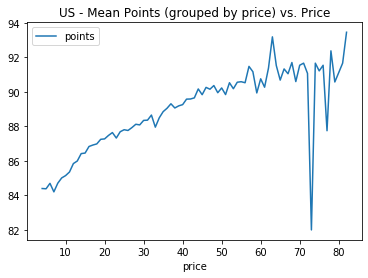

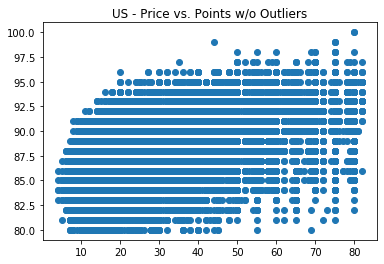

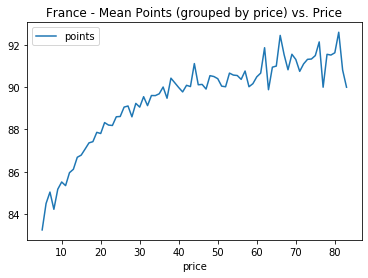

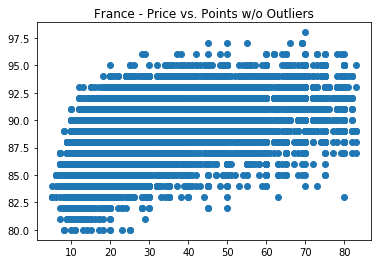

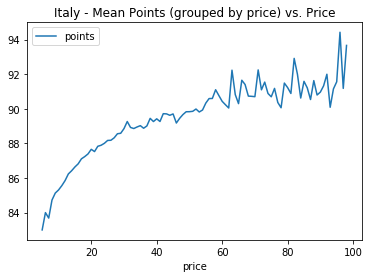

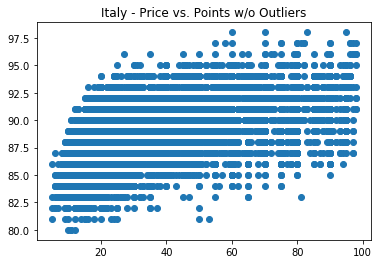

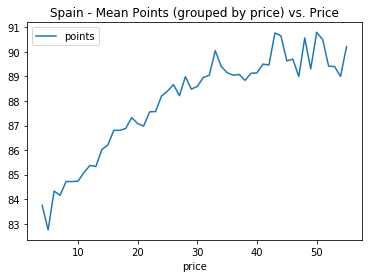

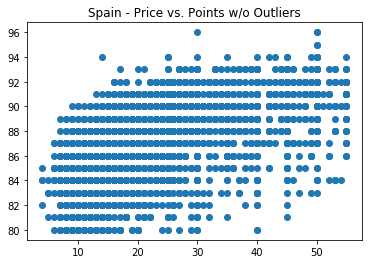

In [42]:
#Grouping by top 5 country's and doing price analysis against each
#Grabbing list for filter
top_four_list = (list(df.groupby('country')
                      .count()
                      .sort_values(by='points', ascending=False)
                      .reset_index()
                      .iloc[0:4, 0]))

for country in top_four_list:
    plot_country(country)